In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from emcee import autocorr

In [2]:
def inverse_exp(a):
    return 1 / np.exp(a)


def find_neares_elem(num, array):
    min = 1
    min_i = 0
    for i in range(100000):
        if 0 < array[i] - num < min:
            # print(array[i] - num)
            min = array[i]
            min_i = i
    return min_i

In [3]:
one_run_path = "Data/One run"
full_data_path = "L="
files_num = 50
_sizes = [10, 20, 30, 40, 80, 120]
seq_length = 100000
# _sizes = [10, 20, 30, 40]
_markers = ["o", "v", "s", "P", "D", "p"]

In [4]:
data = np.zeros((50, seq_length))
mean_data = np.zeros((len(_sizes) , seq_length))
std_data = np.zeros((len(_sizes) , seq_length))
for i in range(len(_sizes)):
    for j in range(50):
        data[j] = np.load(full_data_path + str(_sizes[i]) + "/energies" + str(_sizes[i]) + "_" + str(j) + ".npy")
    mean_data[i] = np.mean(data, axis=0)
    std_data[i] = np.std(data, axis=0)

In [5]:
corr_ind = []
for i in range(len(_sizes)):
    corr_ind.append(autocorr.integrated_time(mean_data[i], c=5, tol=25))
corr_ind = np.array(corr_ind).reshape(len(_sizes))
print(corr_ind)

[  19.75277231   63.68740518  145.06966274  308.47167206  573.86194101
 3288.70625532]


In [9]:
t_corr = {10: 20*4, 20: 65*4, 30: 150*4, 40: 310*4, 80: 580*4, 120: 3300*4}

In [22]:
T_c = tc = 2 / (np.log(1 + 2 ** 0.5))
all_t = np.concatenate((np.linspace(T_c-0.4, 2.28, 40), np.linspace(2.26, 2.28, 40), np.linspace(2.28, T_c+0.4, 40)))
all_t.shape[0]

120

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

In [8]:
# plot_acf(data_E_arr_80[0], lags=100000)
# plt.show()

Усредненная энергия по 50 итерациям для решеток размеров 10, 20, 30 содержится в
mean_E_arr по оси 0, аналогичная величина хранится в mean_E_L40, только генератор для решетки 40 совершал пробег по два раза большему количеству шагов Монте-Карло

In [9]:
def next_pow_two(n):
    """
    Count nearest 2^n >= n for the given length of sequence
    :param n:  length of sequence
    :return: 2^n
    """
    i = 1
    while i < n:
        i = i << 1
    return i


def autocorr_func_1d(x, norm=True):
    """
    :param x: array, sequence for autocorr function count
    :param norm: normilize autocor function. Answer will be [-1, 1]
    :return:
        acf:
    """
    x = np.atleast_1d(x) # convert array to 1 dim, or do nothing with biggest shape
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x)) # n -- 2^a >= len(x)

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n) #
    acf = np.fft.ifft(f * np.conjugate(f))[:len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]
    return acf

In [10]:
mean_data

array([[   -72.6 ,    -73.28,    -73.56, ...,    -74.2 ,    -75.72,
           -75.44],
       [  -286.52,   -287.12,   -282.84, ...,   -292.56,   -292.76,
          -288.88],
       [  -648.44,   -652.28,   -647.  , ...,   -632.68,   -631.12,
          -635.92],
       [ -1154.48,  -1152.48,  -1151.84, ...,  -1136.88,  -1129.52,
         -1128.52],
       [ -4551.32,  -4541.96,  -4542.96, ...,  -4565.52,  -4562.32,
         -4550.52],
       [-10174.72, -10170.52, -10188.56, ..., -10200.08, -10216.24,
        -10218.36]])

In [11]:
data_10_20_30 = []
std_data_10_20_30 = []
for i in range(len(_sizes)):
        data_10_20_30.append(autocorr_func_1d(mean_data[i]))
        std_data_10_20_30 = autocorr_func_1d(std_data[i])
data_10_20_30 = np.array(data_10_20_30)
std_data_10_20_30 = np.array(std_data_10_20_30)

In [12]:
# for i in range(len(_sizes)):
#     if _sizes[i] == 40:
#         np.save('Data/autocor/L40.npy', data_40_num)
#     elif _sizes[i] == 80:
#         np.save('Data/autocor/L80.npy', data_80_num)
#     else:
#         np.save('Data/autocor/L' + str(_sizes[i]) + '.npy', data_10_20_30_num[i])

In [13]:
data_10_20_30

array([[ 1.00000000e+00,  7.89281657e-01,  6.60880920e-01, ...,
        -6.03658388e-06, -1.00829998e-05, -6.23972254e-06],
       [ 1.00000000e+00,  8.47845938e-01,  7.55871410e-01, ...,
        -8.47174919e-06, -5.18289959e-06,  3.86159714e-07],
       [ 1.00000000e+00,  8.64121039e-01,  7.82600557e-01, ...,
        -3.33872257e-05, -2.40989283e-05, -6.21322734e-06],
       [ 1.00000000e+00,  8.83501329e-01,  8.12638571e-01, ...,
        -3.67852347e-05, -3.30411419e-05, -1.87813244e-05],
       [ 1.00000000e+00,  8.92792545e-01,  8.28145027e-01, ...,
        -1.74292382e-06,  4.83217204e-07,  7.67979974e-08],
       [ 1.00000000e+00,  9.03217399e-01,  8.45344032e-01, ...,
         1.89825722e-05,  7.34858430e-06,  3.00304947e-06]])

In [14]:
# std_80 = np.std(data_80_num, axis=0)
# data_80 = np.mean(data_80_num, axis=0)
# std_40 = np.std(data_40_num, axis=0)
# data_40 = np.mean(data_40_num, axis=0)
# std_10_20_30 = np.std(data_10_20_30_num, axis=1)
# data_10_20_30 = np.mean(data_10_20_30_num, axis=1)

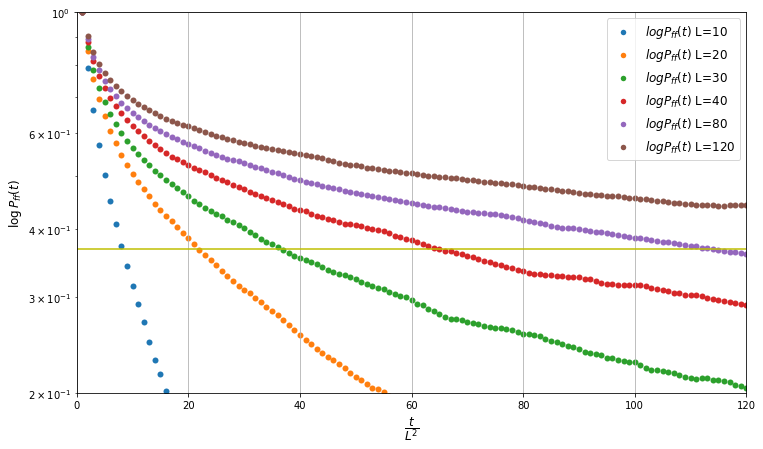

In [15]:
plt.figure(figsize=(12, 7))
for i in range(len(_sizes)):
    plt.scatter(np.linspace(1, seq_length, seq_length), data_10_20_30[i],
                label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]), linewidth=0, linestyle='None')
plt.yscale("log")
plt.xlabel(r'$\dfrac{t}{L^2}$', fontsize=12)
plt.ylabel(r'$\log P_{ff}(t)$', fontsize=12)
plt.axhline(y=0, color='y')
plt.axhline(y=inverse_exp(1), color='y')
plt.grid()
plt.xlim(0, 120)
plt.ylim(0.2, 1)
# legend
lgnd = plt.legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.savefig("pictures/autocorr(mean) L=all n=mean(50) log-Pff t-Lsq")

In [16]:
print("Border value is about: ", inverse_exp(1))
indexes = np.zeros((len(_sizes)))
stds = np.zeros((len(_sizes), files_num))
for i in range(len(_sizes)):
        ind = find_neares_elem(inverse_exp(1), data_10_20_30[i])
        indexes[i] = ind
for i in range(len(_sizes)):
    print("Elem index for L", str(_sizes[i]), " is ", int(indexes[i]))

Border value is about:  0.36787944117144233
Elem index for L 10  is  7
Elem index for L 20  is  20
Elem index for L 30  is  35
Elem index for L 40  is  63
Elem index for L 80  is  112
Elem index for L 120  is  289


In [17]:
corr_ind = []
for i in range(len(_sizes)):
    corr_ind.append(autocorr.integrated_time(mean_data[i], c=6, tol=100))
corr_ind = np.array(corr_ind).reshape(5)
print(corr_ind)

AutocorrError: The chain is shorter than 100 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/100 = 1000;
tau: [3116.84046056]

In [19]:
data = np.zeros((len(_sizes), 50, seq_length))
for i in range(len(_sizes)):
    for j in range(50):
        data[i][j] = np.load(full_data_path + str(_sizes[i]) + "/energies" + str(_sizes[i]) + "_" + str(j) + ".npy")

In [20]:
data_corr = np.zeros((len(_sizes), 50, seq_length))
for i in range(len(_sizes)):
    for j in range(50):
        data_corr[i][j] = autocorr_func_1d(data[i][j])

In [21]:
mean_data_corr = np.mean(data_corr, axis=1)
std_data_corr = np.std(data_corr, axis=1)

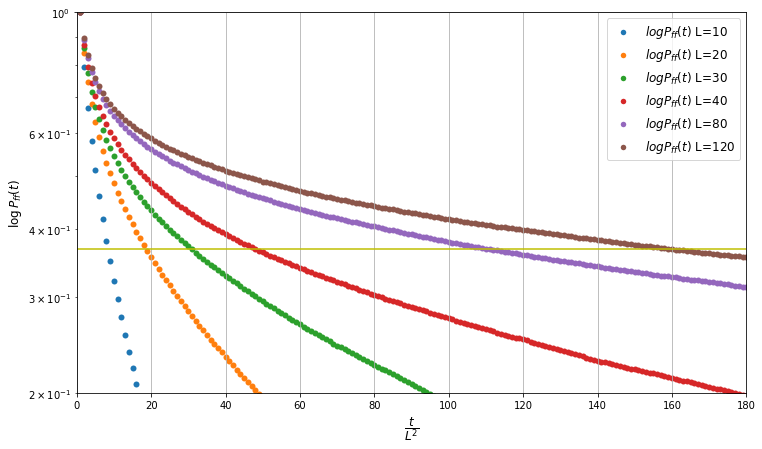

In [23]:
plt.figure(figsize=(12, 7))
seqlen = 1000
for i in range(len(_sizes)):
    plt.scatter(np.linspace(1, seqlen, seqlen), mean_data_corr[i][0:seqlen],
                label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]), linewidth=0, linestyle='None')
plt.yscale("log")
plt.xlabel(r'$\dfrac{t}{L^2}$', fontsize=12)
plt.ylabel(r'$\log P_{ff}(t)$', fontsize=12)
plt.axhline(y=0, color='y')
plt.axhline(y=inverse_exp(1), color='y')
plt.grid()
plt.xlim(0, 180)
plt.ylim(0.2, 1)
# legend
lgnd = plt.legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.savefig("pictures/mean(autocorr) L=all n=50 log-Pff t-Lsq")

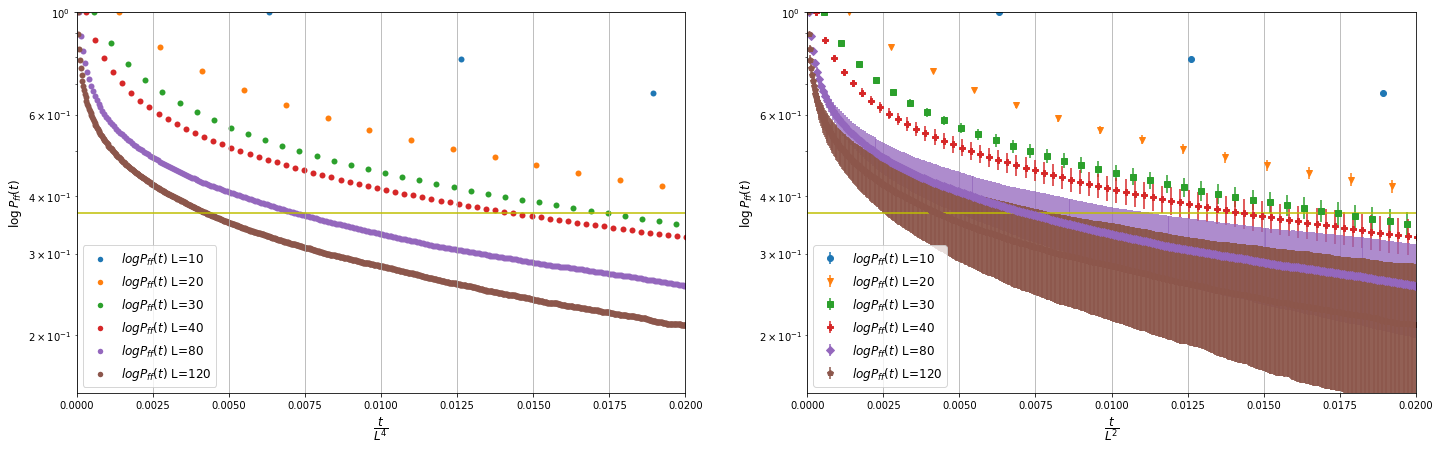

In [26]:
seqlen = 2000
xscale = 0.02
div = 2.2
fig, axs = plt.subplots(1, 2, figsize=(24, 7))
for i in range(len(_sizes)):
    axs[0].scatter(np.linspace(1, seqlen, seqlen)  / (_sizes[i] ** div), mean_data_corr[i][0:seqlen],
                label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]), linewidth=0, linestyle='None')
axs[0].set_yscale("log")
axs[0].set_xlabel(r'$\dfrac{t}{L^4}$', fontsize=12)
axs[0].set_ylabel(r'$\log P_{ff}(t)$', fontsize=12)
axs[0].axhline(y=0, color='y')
axs[0].axhline(y=inverse_exp(1), color='y')
axs[0].grid()
axs[0].set_xlim(0, xscale)
axs[0].set_ylim(0.15, 1)
# legend
lgnd = axs[0].legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
# plt.savefig("pictures/mean(autocorr) L=all n=50 log-Pff t-Lsq")

for i in range(len(_sizes)):
    axs[1].errorbar(np.linspace(1, seqlen, seqlen)  / (_sizes[i] ** div), mean_data_corr[i][0:seqlen], std_data_corr[i][0:seqlen],
                 label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]), linestyle='None', marker=_markers[i])
axs[1].set_yscale("log")
axs[1].set_xlabel(r'$\dfrac{t}{L^2}$', fontsize=12)
axs[1].set_ylabel(r'$\log P_{ff}(t)$', fontsize=12)
axs[1].axhline(y=0, color='y')
axs[1].axhline(y=inverse_exp(1), color='y')
axs[1].grid()
axs[1].set_xlim(0, xscale)
axs[1].set_ylim(0.15, 1)
# legend
lgnd = axs[1].legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.savefig("pictures/mean(autocorr) L=all n=50 log-Pff t-L^4 std")

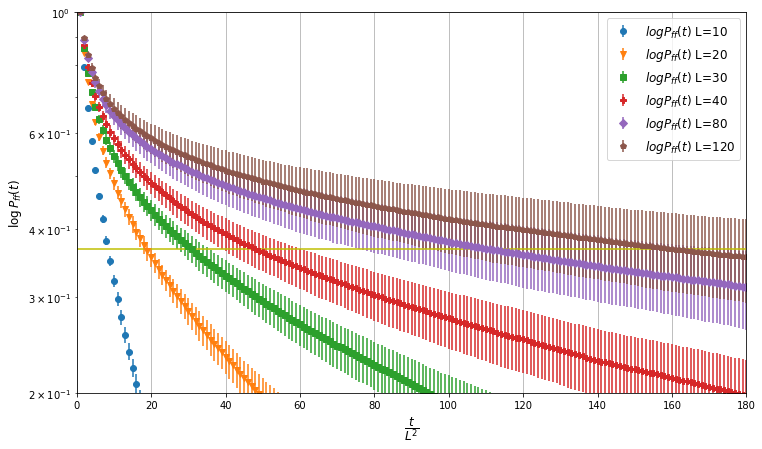

In [46]:
plt.figure(figsize=(12, 7))
for i in range(len(_sizes)):
    plt.errorbar(np.linspace(1, seqlen, seqlen), mean_data_corr[i][0:seqlen], std_data_corr[i][0:seqlen],
                label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]), linestyle='None', marker=_markers[i])
plt.yscale("log")
plt.xlabel(r'$\dfrac{t}{L^2}$', fontsize=12)
plt.ylabel(r'$\log P_{ff}(t)$', fontsize=12)
plt.axhline(y=0, color='y')
plt.axhline(y=inverse_exp(1), color='y')
plt.grid()
plt.xlim(0, 180)
plt.ylim(0.2, 1)
# legend
lgnd = plt.legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.savefig("pictures/mean(autocorr) L=all n=50 log-Pff t-Lsq std")

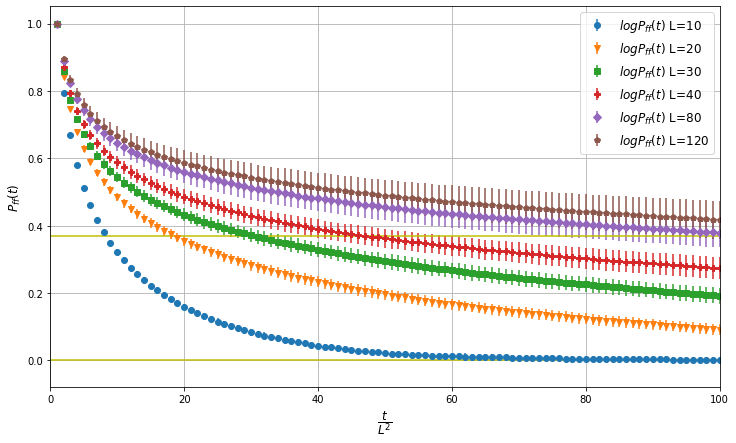

In [28]:
plt.figure(figsize=(12, 7))
for i in range(len(_sizes)):
    plt.errorbar(np.linspace(1, seqlen, seqlen), mean_data_corr[i][0:seqlen], std_data_corr[i][0:seqlen],
                 label=r'$log P_{ff}(t)$ L=' + str(_sizes[i]),  linestyle='None', marker=_markers[i])
plt.xlabel(r'$\dfrac{t}{L^2}$', fontsize=12)
plt.ylabel(r'$P_{ff}(t)$', fontsize=12)
plt.axhline(y=0, color='y')
plt.axhline(y=inverse_exp(1), color='y')
plt.grid()
plt.xlim(0, 100)
# legend
lgnd = plt.legend(loc='best', fontsize=12)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.savefig("pictures/mean(autocorr) L=all Pff t-Lsq")

In [29]:
print("Border value is about: ", inverse_exp(1))
indexes = np.zeros((len(_sizes)))
stds = np.zeros((len(_sizes)))
for i in range(len(_sizes)):
    ind = find_neares_elem(inverse_exp(1), mean_data_corr[i])
    indexes[i] = ind
    stds[i] = std_data[i][ind]
for i in range(len(_sizes)):
    print("Elem index for L", str(_sizes[i]), " is ", int(indexes[i]), ' with error ', stds[i])

Border value is about:  0.36787944117144233
Elem index for L 10  is  7  with error  12.839688469741002
Elem index for L 20  is  17  with error  28.142949383460145
Elem index for L 30  is  29  with error  42.89402755629273
Elem index for L 40  is  46  with error  57.32662906538287
Elem index for L 80  is  109  with error  103.72736572380501
Elem index for L 120  is  158  with error  209.60954176754456


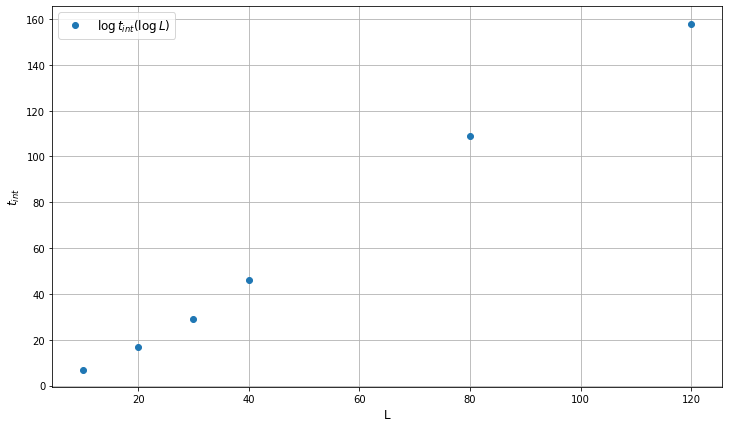

In [30]:
plt.figure(figsize=(12, 7))
plt.errorbar(_sizes, indexes, label=r'$\log t_{int}(\log L)$', linestyle='None',
             marker=_markers[0])
plt.grid()
plt.xlabel('L', fontsize=12)
plt.ylabel(r'$t_{int}$', fontsize=12)
plt.legend(loc='best', fontsize=12)
# plt.savefig("pictures/t_int(L) loglog")

In [31]:
from sklearn.linear_model import LinearRegression


def lin_regr_approx(x, y):
    #
    # аппроксимация распределения линейной функцией
    # и создание графика по параметрам распределения
    #
    x_pred = np.linspace(x.min(axis=0), x.max(axis=0), 50)
    reg = LinearRegression().fit(x, y)
    y_pred = reg.predict(x_pred)
    k = reg.coef_[0][0]
    b = reg.predict([[0]])[0][0]
    angle = np.rad2deg(np.arctan(k))
    score = reg.score(x, y)
    return (x_pred, y_pred), k, b, angle, score

In [32]:
data, k, b, angle, score = lin_regr_approx(np.array(_sizes).reshape(-1, 1), indexes.reshape(-1, 1))
print(f'{k}')
print(f'{angle}')

1.420454545454545
54.85445450029393


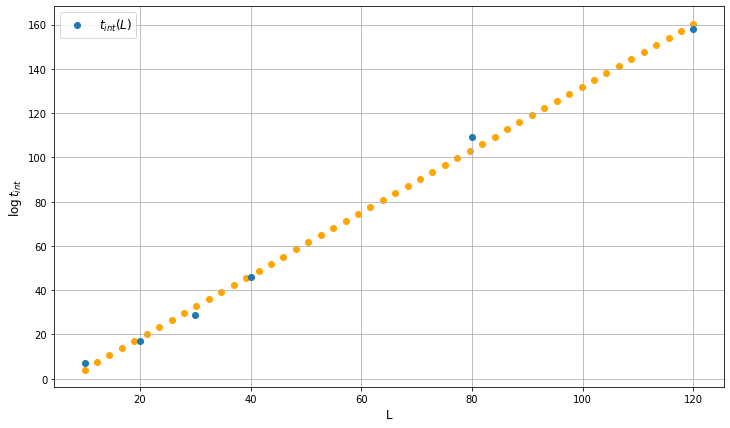

In [33]:
plt.figure(figsize=(12, 7))
plt.errorbar(_sizes, indexes,label=r'$t_{int}(L)$', linestyle='None',
             marker=_markers[0])
plt.scatter(data[0], data[1], marker=_markers[0], color='orange')
plt.xlabel('L', fontsize=12)
plt.ylabel(r'$\logt_{int}$', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()
# plt.savefig("pictures/t_int(L) loglog")

In [44]:
data, k, b, angle, score = lin_regr_approx(np.log(np.array(_sizes)).reshape(-1, 1), np.log(indexes.reshape(-1, 1)))
print(f'{k}')
print(f'{b}')

1.2792886898958407
-0.9749650177054465


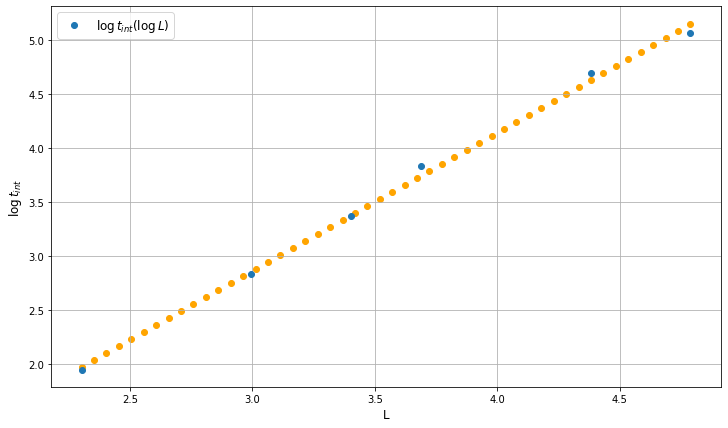

In [45]:
plt.figure(figsize=(12, 7))
plt.errorbar(np.log(_sizes), np.log(indexes),label=r'$\log t_{int}(\log L)$', linestyle='None',
             marker=_markers[0])
plt.scatter(data[0], data[1], marker=_markers[0], color='orange')
plt.xlabel('L', fontsize=12)
plt.ylabel(r'$\logt_{int}$', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()
# plt.savefig("pictures/t_int(L) loglog")